In [ ]:
from google.colab import drive
import zipfile
import os

drive.mount('/content/drive')
with zipfile.ZipFile('/content/drive/MyDrive/Dataset_Bersih.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import DenseNet201

# Path ke direktori dataset
dataset_dir = '/content/Dataset Bersih'

# Memuat dataset dengan shuffle diatur ke True
full_dataset = image_dataset_from_directory(dataset_dir,
                                            labels='inferred',
                                            label_mode='int',
                                            image_size=(224, 224),
                                            batch_size=32,
                                            shuffle=True)

# Memuat VGG16 pre-trained model
vgg_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3),
                                                     include_top=False,
                                                     weights='imagenet')
vgg_model.trainable = True

# Memuat DenseNet201 pre-trained model
densenet_model = tf.keras.applications.DenseNet201(input_shape=(224, 224, 3),
                                                 include_top=False,
                                                 weights='imagenet')
densenet_model.trainable = True

# Membuat generator fitur dari dataset menggunakan VGG16
vgg_feature_extractor = tf.keras.Sequential([
    vgg_model,
    tf.keras.layers.GlobalAveragePooling2D()
])

# Membuat generator fitur dari dataset menggunakan DenseNet201
densenet_feature_extractor = tf.keras.Sequential([
    densenet_model,
    tf.keras.layers.GlobalAveragePooling2D()
])

# Inisialisasi list untuk menyimpan fitur dan label
vgg_features_list = []
densenet_features_list = []
labels_list = []

# Ekstrak fitur dari dataset menggunakan VGG16 dan DenseNet201
for images, labels in full_dataset:
    # Ekstraksi fitur menggunakan VGG16
    vgg_features = vgg_feature_extractor(images)
    vgg_features_list.append(vgg_features.numpy())

    # Ekstraksi fitur menggunakan DenseNet201
    densenet_features = densenet_feature_extractor(images)
    densenet_features_list.append(densenet_features.numpy())

    labels_list.append(labels.numpy())

# Menggabungkan fitur dan label menjadi numpy arrays
vgg_features_array = np.concatenate(vgg_features_list)
densenet_features_array = np.concatenate(densenet_features_list)
labels_array = np.concatenate(labels_list)

# Membuat DataFrame dari fitur dan label untuk VGG16
vgg_feature_columns = [f"vgg_feature_{i+1}" for i in range(vgg_features_array.shape[1])]
vgg_df = pd.DataFrame(vgg_features_array, columns=vgg_feature_columns)
vgg_df['label'] = labels_array

# Membuat DataFrame dari fitur dan label untuk DenseNet201
densenet_feature_columns = [f"densenet_feature_{i+1}" for i in range(densenet_features_array.shape[1])]
densenet_df = pd.DataFrame(densenet_features_array, columns=densenet_feature_columns)
densenet_df['label'] = labels_array

# Tampilkan DataFrame untuk VGG16
print("DataFrame untuk VGG16:")
print(vgg_df)




Found 1725 files belonging to 3 classes.
74836368/74836368 [==============================] - 4s 0us/step
DataFrame untuk VGG16:
      vgg_feature_1  vgg_feature_2  vgg_feature_3  vgg_feature_4  \
0          0.000000       0.000000       0.538602       0.000000   
1          0.000000       0.000000       0.000000       0.000000   
2          0.172859       0.000000       0.000000       0.000000   
3         13.334599       7.522898       4.913555       0.421052   
4          0.000000       0.000000       0.000000       0.000000   
...             ...            ...            ...            ...   
1720       0.321075       0.888741      25.555071       0.000000   
1721       0.481880       0.000000       1.063731       0.000000   
1722       0.000000       0.000000       0.000000       0.000000   
1723       0.000000       0.000000       0.126234       0.000000   
1724       0.000000       0.000000       0.976120       0.000000   

      vgg_feature_5  vgg_feature_6  vgg_feature_7  vgg

In [ ]:
# Tampilkan DataFrame untuk DenseNet201
print("\nDataFrame untuk DenseNet201:")
print(densenet_df)


DataFrame untuk DenseNet201:
      densenet_feature_1  densenet_feature_2  ...  densenet_feature_1920  label
0               0.000050            0.000000  ...               0.035610      2
1               0.000000            0.000000  ...               0.008667      0
2               0.000012            0.000020  ...               0.030148      1
3               0.000006            0.000000  ...               0.006546      0
4               0.000000            0.000000  ...               0.000000      0
...                  ...                 ...  ...                    ...    ...
1720            0.000000            0.000008  ...               0.018941      0
1721            0.000022            0.000000  ...               1.157611      2
1722            0.000035            0.000000  ...               0.373772      1
1723            0.000000            0.000000  ...               0.003230      0
1724            0.000000            0.000000  ...               0.382061      0

[1725 row

In [ ]:
# Menggabungkan fitur dan label menjadi numpy arrays
vgg_features_array = np.concatenate(vgg_features_list)
densenet_features_array = np.concatenate(densenet_features_list)
labels_array = np.concatenate(labels_list)

# Gabungkan fitur dari BGG16 dan DenseNet201
combined_features_array = np.concatenate([vgg_features_array, densenet_features_array], axis=1)

# Membuat DataFrame dari fitur gabungan dan label
combined_feature_columns = [f"feature_{i+1}" for i in range(combined_features_array.shape[1])]
combined_df = pd.DataFrame(combined_features_array, columns=combined_feature_columns)
combined_df['label'] = labels_array

# Function to map label integer to class name
def map_label(label):
    class_names = ['mel', 'bcc', 'norm']
    return class_names[label]

# Applying map_label function to convert labels to class names
combined_df['label'] = combined_df['label'].apply(map_label)

# Displaying DataFrame with better format
pd.set_option('display.max_columns', 10)  # Show all columns
pd.set_option('display.max_rows', 10)  # Limit the number of rows displayed
pd.set_option('display.float_format', lambda x: '%.4f' % x)  # Format float numbers

# Tampilkan DataFrame gabungan
print("DataFrame gabungan untuk MobileNetV2 dan vgg50V2:")

# Showing the first few rows of the DataFrame
print(combined_df.head())

DataFrame gabungan untuk MobileNetV2 dan vgg50V2:
   feature_1  feature_2  feature_3  feature_4  feature_5  ...  feature_2429  \
0     0.0000     0.0000     0.5386     0.0000     1.1496  ...        0.2302   
1     0.0000     0.0000     0.0000     0.0000     0.0000  ...        0.2590   
2     0.1729     0.0000     0.0000     0.0000     0.0000  ...        0.0021   
3    13.3346     7.5229     4.9136     0.4211     0.0000  ...        0.1790   
4     0.0000     0.0000     0.0000     0.0000     0.1173  ...        0.0000   

   feature_2430  feature_2431  feature_2432  label  
0        0.1442        0.5310        0.0800    mel  
1        0.0536        1.2677        0.0618    mel  
2        0.0000        1.7962        0.0068    mel  
3        0.0359        0.6968        0.1802    bcc  
4        0.2212        0.2641        0.2758   norm  

[5 rows x 2433 columns]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import joblib  # untuk menyimpan model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold

k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []
precisions = []
sensitivities = []
specificities = []
f1_scores = []
best_accuracy = 0
best_model = None
best_confusion_matrix = None
best_classification_report = None

for fold, (train_index, test_index) in enumerate(skf.split(combined_features_array, labels_array)):
    train_features, test_features = combined_features_array[train_index], combined_features_array[test_index]
    train_labels, test_labels = labels_array[train_index], labels_array[test_index]

    svm = SVC()
    svm.fit(train_features, train_labels)

    predictions = svm.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    accuracies.append(accuracy)

    precision = precision_score(test_labels, predictions, average='weighted')
    precisions.append(precision)

    recall = recall_score(test_labels, predictions, average='weighted')
    sensitivities.append(recall)

    cm = confusion_matrix(test_labels, predictions)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    specificity = np.mean(specificity)
    specificities.append(specificity)

    f1 = f1_score(test_labels, predictions, average='weighted')
    f1_scores.append(f1)

    print(f'Fold {fold + 1}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Sensitivity: {recall:.4f}, Specificity: {specificity:.4f}, F1-score: {f1:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = svm
        best_confusion_matrix = cm
        best_classification_report = classification_report(test_labels, predictions)
        joblib.dump(best_model, 'best_svm_model.pkl')

average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_sensitivity = np.mean(sensitivities)
average_specificity = np.mean(specificities)
average_f1 = np.mean(f1_scores)

print(f'Average accuracy: {average_accuracy:.4f}, Best accuracy: {best_accuracy:.4f}')
print("Best Confusion Matrix:")
print(best_confusion_matrix)
print("Best Classification Report:")
print(best_classification_report)

print(f'Average Precision: {average_precision:.4f}')
print(f'Average Sensitivity: {average_sensitivity:.4f}')
print(f'Average Specificity: {average_specificity:.4f}')
print(f'Average F1-score: {average_f1:.4f}')

Fold 1, Accuracy: 0.8319, Precision: 0.8356, Sensitivity: 0.8319, Specificity: 0.8319, F1-score: 0.8322
Fold 2, Accuracy: 0.8522, Precision: 0.8580, Sensitivity: 0.8522, Specificity: 0.8522, F1-score: 0.8532
Fold 3, Accuracy: 0.8754, Precision: 0.8772, Sensitivity: 0.8754, Specificity: 0.8754, F1-score: 0.8755
Fold 4, Accuracy: 0.8609, Precision: 0.8634, Sensitivity: 0.8609, Specificity: 0.8609, F1-score: 0.8617
Fold 5, Accuracy: 0.8493, Precision: 0.8549, Sensitivity: 0.8493, Specificity: 0.8493, F1-score: 0.8500
Average accuracy: 0.8539, Best accuracy: 0.8754
Best Confusion Matrix:
[[102   8   5]
 [  8 103   4]
 [ 12   6  97]]
Best Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       115
           1       0.88      0.90      0.89       115
           2       0.92      0.84      0.88       115

    accuracy                           0.88       345
   macro avg       0.88      0.88      0.88       345
weighted 

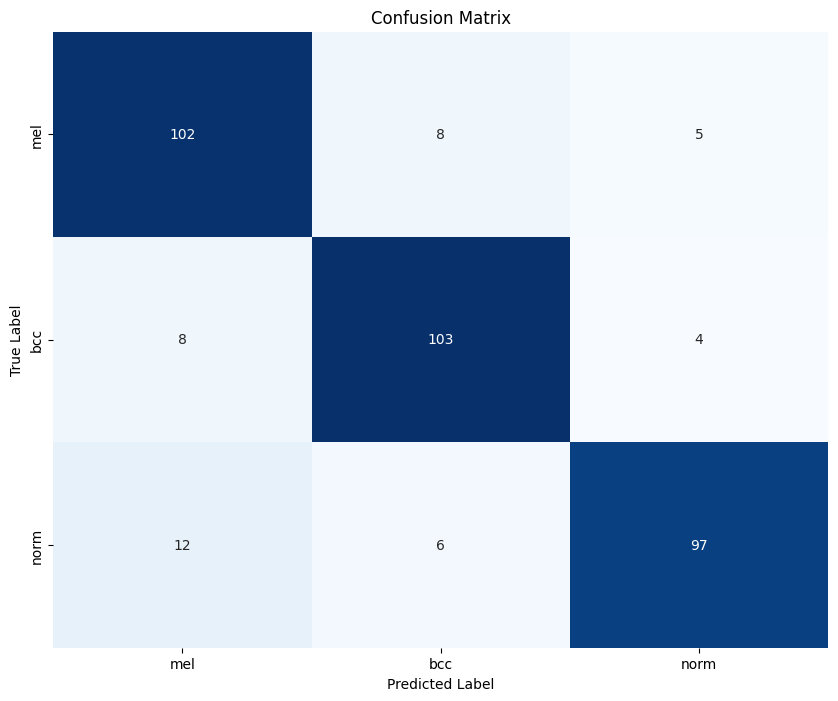

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting Confusion Matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# Menampilkan Confusion Matrix dengan label yang tepat
plt.figure(figsize=(10, 8))
sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Mendapatkan nama kelas dari variabel class_names
class_names = ['mel', 'bcc', 'norm']

# Menambahkan label ke sumbu x dan y
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, ha='center')
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, va='center')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Memuat model SVM terbaik yang sudah disimpan sebelumnya
best_svm = joblib.load('best_svm_model.pkl')

# Parameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=best_svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Melakukan grid search
grid_search.fit(train_features, train_labels)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib

# Best parameters obtained from GridSearchCV
best_params = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

k = 5  # Number of folds
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracies = []
precisions = []
sensitivities = []
specificities = []
f1_scores = []
best_accuracy = 0
best_model = None
best_confusion_matrix = None
best_classification_report = None

for fold, (train_index, test_index) in enumerate(skf.split(combined_features_array, labels_array)):
    train_features, test_features = combined_features_array[train_index], combined_features_array[test_index]
    train_labels, test_labels = labels_array[train_index], labels_array[test_index]

    svm = SVC(**best_params)
    svm.fit(train_features, train_labels)

    predictions = svm.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    accuracies.append(accuracy)

    precision = precision_score(test_labels, predictions, average='weighted')
    precisions.append(precision)

    recall = recall_score(test_labels, predictions, average='weighted')
    sensitivities.append(recall)

    cm = confusion_matrix(test_labels, predictions)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    specificity = np.mean(specificity)
    specificities.append(specificity)

    f1 = f1_score(test_labels, predictions, average='weighted')
    f1_scores.append(f1)

    print(f'Fold {fold + 1}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Sensitivity: {recall:.4f}, Specificity: {specificity:.4f}, F1-score: {f1:.4f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = svm
        best_confusion_matrix = cm
        best_classification_report = classification_report(test_labels, predictions)
        joblib.dump(best_model, 'best_svm_model_tuning.pkl')

average_accuracy = np.mean(accuracies)
average_precision = np.mean(precisions)
average_sensitivity = np.mean(sensitivities)
average_specificity = np.mean(specificities)
average_f1 = np.mean(f1_scores)

print(f'Average accuracy: {average_accuracy:.4f}, Best accuracy: {best_accuracy:.4f}')
print("Best Confusion Matrix:")
print(best_confusion_matrix)
print("Best Classification Report:")
print(best_classification_report)

print(f'Average Precision: {average_precision:.4f}')
print(f'Average Sensitivity: {average_sensitivity:.4f}')
print(f'Average Specificity: {average_specificity:.4f}')
print(f'Average F1-score: {average_f1:.4f}')

Fold 1, Accuracy: 0.8609, Precision: 0.8620, Sensitivity: 0.8609, Specificity: 0.8609, F1-score: 0.8604
Fold 2, Accuracy: 0.8783, Precision: 0.8815, Sensitivity: 0.8783, Specificity: 0.8783, F1-score: 0.8787
Fold 3, Accuracy: 0.8841, Precision: 0.8841, Sensitivity: 0.8841, Specificity: 0.8841, F1-score: 0.8839
Fold 4, Accuracy: 0.9159, Precision: 0.9165, Sensitivity: 0.9159, Specificity: 0.9159, F1-score: 0.9161
Fold 5, Accuracy: 0.8870, Precision: 0.8886, Sensitivity: 0.8870, Specificity: 0.8870, F1-score: 0.8870
Average accuracy: 0.8852, Best accuracy: 0.9159
Best Confusion Matrix:
[[106   6   3]
 [  7 105   3]
 [  5   5 105]]
Best Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       115
           1       0.91      0.91      0.91       115
           2       0.95      0.91      0.93       115

    accuracy                           0.92       345
   macro avg       0.92      0.92      0.92       345
weighted 

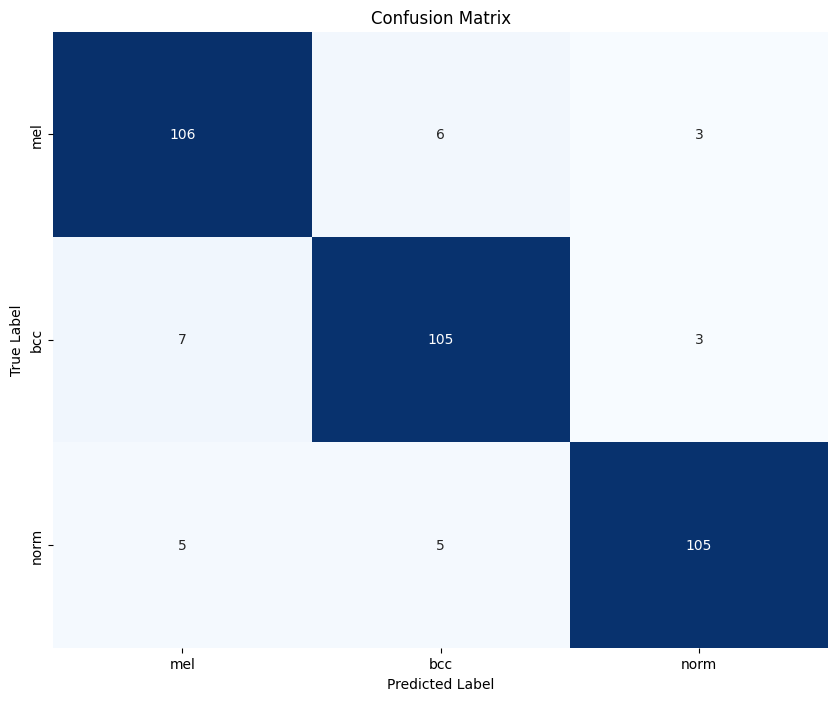

In [ ]:
# Menampilkan Confusion Matrix dengan label yang tepat
plt.figure(figsize=(10, 8))
sns.heatmap(best_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Mendapatkan nama kelas dari variabel class_names
class_names = ['mel', 'bcc', 'norm']

# Menambahkan label ke sumbu x dan y
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, ha='center')
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, va='center')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()